In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
transactions = pd.read_csv("../project_data/project_transactions.csv",
dtype={'DAY':'int16',
      'QUANTITY':'int32',
      'STORE_ID':'int32',
      'WEEK_NO':'int8'})

In [3]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [4]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
household_key        int64
BASKET_ID            int64
DAY                  int16
PRODUCT_ID           int64
QUANTITY             int32
SALES_VALUE          float64
STORE_ID             int32
RETAIL_DISC          float64
WEEK_NO              int8
COUPON_DISC          float64
COUPON_MATCH_DISC    float64
dtypes: float64(4), int16(1), int32(2), int64(3), int8(1)
memory usage: 137.1 MB


In [5]:
transactions.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [6]:
transactions['household_key'].nunique()

2099

In [7]:
transactions['PRODUCT_ID'].nunique()

84138

In [8]:
transactions.describe().round()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2146311.0,2.146311e+06,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0
mean,1056.0,3.404897e+10,390.0,2884715.0,101.0,3.0,3268.0,-1.0,56.0,-0.0,-0.0
std,605.0,4.723748e+09,190.0,3831949.0,1152.0,4.0,9122.0,1.0,27.0,0.0,0.0
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0,1.0,-130.0,1.0,-56.0,-8.0
25%,548.0,3.040798e+10,229.0,917231.0,1.0,1.0,330.0,-1.0,33.0,0.0,0.0
50%,1042.0,3.281176e+10,392.0,1027960.0,1.0,2.0,372.0,0.0,57.0,0.0,0.0
75%,1581.0,4.012804e+10,555.0,1132771.0,1.0,3.0,422.0,0.0,80.0,0.0,0.0
max,2099.0,4.230536e+10,711.0,18316298.0,89638.0,840.0,34280.0,4.0,102.0,0.0,0.0


In [9]:
transactions=(
    transactions
    .assign(total_discount=transactions["RETAIL_DISC"]+transactions["COUPON_DISC"],
           percentage_discount=(lambda x:(x["total_discount"]/x["SALES_VALUE"]).abs()))
    .drop(["RETAIL_DISC", "COUPON_DISC", "COUPON_MATCH_DISC"],axis=1))
transactions["percentage_discount"]=(transactions["percentage_discount"]
                                    .where(transactions["percentage_discount"]>1,1.0)
                                    .where(transactions["percentage_discount"]<0,0)
                                    )

In [10]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.0
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.0
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.0
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.0
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,0.0


In [21]:
transactions["SALES_VALUE"].sum()

6666243.499999999

In [12]:
transactions["total_discount"].sum()

-1178658.0799999998

In [13]:
transactions["SALES_VALUE"].sum() / transactions["total_discount"].sum()

-5.655790778611554

In [14]:
transactions["QUANTITY"].sum()

216713611

In [15]:
transactions["QUANTITY"].max()

89638

In [18]:
transactions.loc[transactions["QUANTITY"].idxmax()] #becouse of the older version i have to use idxmax() instead of argmax().

household_key          6.300000e+02
BASKET_ID              3.474915e+10
DAY                    5.030000e+02
PRODUCT_ID             6.534178e+06
QUANTITY               8.963800e+04
SALES_VALUE            2.500000e+02
STORE_ID               3.840000e+02
WEEK_NO                7.300000e+01
total_discount        -1.345000e+01
percentage_discount    0.000000e+00
Name: 1442095, dtype: float64

In [22]:
sales_sum/transactions["BASKET_ID"].nunique()

28.61797938516092

In [23]:
sales_sum/transactions["household_key"].nunique()

3175.9140066698424

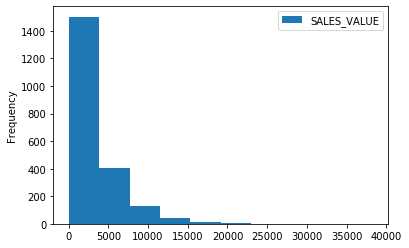

In [31]:
(transactions
 .groupby("household_key")
 .agg({"SALES_VALUE":"sum"})
 .plot.hist());

In [39]:
top10_value=(transactions.
            groupby("household_key")
            .agg({"SALES_VALUE":"sum"})
            .sort_values("SALES_VALUE",ascending=False)
            .iloc[:10])
top10_quantity=(transactions.
            groupby("household_key")
            .agg({"QUANTITY":"sum"})
            .sort_values("QUANTITY",ascending=False)
               .iloc[:10])

In [40]:
top10_value

,SALES_VALUE
household_key,
1023,38319.79
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
1653,19153.75
1111,18894.72
982,18790.34


In [41]:
top10_quantity

,QUANTITY
household_key,
1023,4479917
755,3141769
1609,2146715
13,1863829
1430,1741892
1527,1734632
1762,1669880
707,1640193
1029,1496204


In [43]:
(transactions
.groupby("household_key")
.agg({"SALES_VALUE":"sum","QUANTITY":"sum"})
.sort_values("SALES_VALUE",ascending=False)
.loc[:,"SALES_VALUE"]
.describe())

count     2099.000000
mean      3175.914007
std       3287.043772
min          8.170000
25%        971.035000
50%       2145.710000
75%       4295.395000
max      38319.790000
Name: SALES_VALUE, dtype: float64

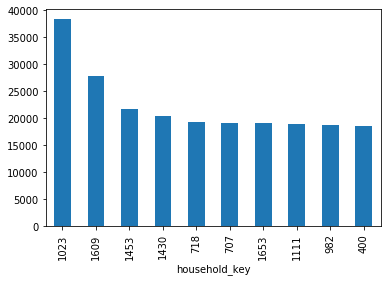

In [45]:
top10_value["SALES_VALUE"].plot.bar();

In [46]:
top10_products=(transactions
               .groupby("PRODUCT_ID")
               .agg({"SALES_VALUE":"sum"}) 
               .sort_values("SALES_VALUE",ascending=False)
               .iloc[:10])

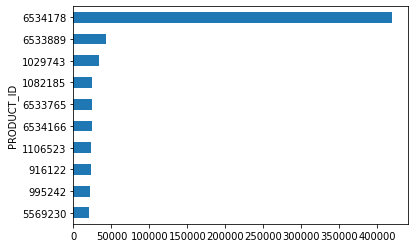

In [48]:
top10_products["SALES_VALUE"].sort_values().plot.barh()

In [51]:
((transactions
.query("PRODUCT_ID in @ top10_products.index")
.loc[:,'total_discount']
.sum())
/
(transactions
.query("PRODUCT_ID in @ top10_products.index")
.loc[:,"SALES_VALUE"]
.sum()))

-0.10331267387397927

In [53]:
products=pd.read_csv(r"C:\Users\Windows 7\Documents\mypython\Pandas Course Resources\project_data\product.csv")

In [54]:
products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [59]:
top_househ_products=(transactions
                    .query("household_key in @ top10_value.index")
                    .loc[:,"PRODUCT_ID"]
                    .value_counts()
                    .iloc[:10]
                    .index)

In [60]:
top_househ_products

Int64Index([1082185, 1029743, 6534178, 6533889, 1127831,  951590,  860776,
            1106523,  981760, 9677202],
           dtype='int64')

In [61]:
products.query("PRODUCT_ID in @ top_househ_products")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
10630,860776,2,PRODUCE,National,VEGETABLES - ALL OTHERS,CUCUMBERS,36 CT
20973,951590,910,GROCERY,National,BAKED BREAD/BUNS/ROLLS,MAINSTREAM WHITE BREAD,20 OZ
24250,981760,69,GROCERY,Private,EGGS,EGGS - X-LARGE,1 DZ
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
40600,1127831,5937,PRODUCE,National,BERRIES,STRAWBERRIES,16 OZ
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
68952,9677202,69,GROCERY,Private,PAPER TOWELS,PAPER TOWELS & HOLDERS,


In [63]:
products.query("PRODUCT_ID in @ top10_products.index")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
16863,916122,4314,MEAT,National,CHICKEN,CHICKEN BREAST BONELESS,
25754,995242,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
53097,5569230,1208,GROCERY,National,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,12 OZ
57171,6533765,69,KIOSK-GAS,Private,FUEL,GASOLINE-REG UNLEADED,
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57216,6534166,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
